# Important imports

In [68]:
import numpy as np 
import pandas as pd
from knn_impute import *
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report , f1_score
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer ,TfidfTransformer
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import string
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,  MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from fancyimpute import KNN
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

# Data preprocessing

In [3]:
display (train.head() , train.info() , train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


None

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,22863.223529,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,4671.135682,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,27125.500000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


In [4]:
lol = train.copy()
lol=pd.concat([train[train['Stage']==1][:300],train[train['Stage']==2][:300],train[train['Stage']==3],train[train['Stage']==4][:300]],axis=0)

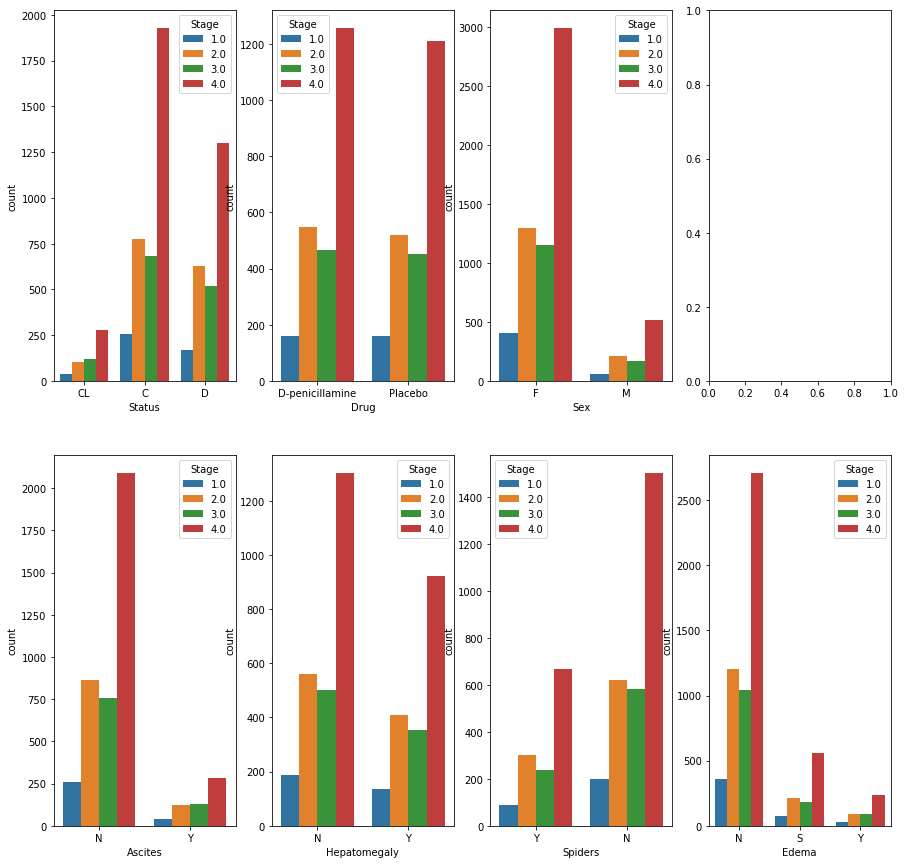

In [5]:
fig, axes = plt.subplots(2 , 4, figsize=(15, 15))
sns.countplot(train["Status"],hue=train['Stage'] , ax = axes [0 , 0] )
sns.countplot(train["Drug"],hue=train['Stage'] , ax = axes [0 , 1] )
sns.countplot(train["Sex"],hue=train['Stage'] , ax = axes [0 , 2] )
sns.countplot(train["Ascites"],hue=train['Stage'] , ax = axes [1 , 0] )
sns.countplot(train["Hepatomegaly"],hue=train['Stage'] , ax = axes [1 , 1] )
sns.countplot(train["Spiders"],hue=train['Stage'] , ax = axes [1 , 2] )
sns.countplot(train["Edema"],hue=train['Stage'] , ax = axes [1 , 3] )

In [6]:
display (lol.head() , lol.info() , lol.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 1 to 595
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2222 non-null   int64  
 1   N_Days         2222 non-null   int64  
 2   Status         2222 non-null   object 
 3   Drug           1530 non-null   object 
 4   Age            2222 non-null   int64  
 5   Sex            2222 non-null   object 
 6   Ascites        1463 non-null   object 
 7   Hepatomegaly   1447 non-null   object 
 8   Spiders        1381 non-null   object 
 9   Edema          2222 non-null   object 
 10  Bilirubin      2222 non-null   float64
 11  Cholesterol    1191 non-null   float64
 12  Albumin        2222 non-null   float64
 13  Copper         1509 non-null   float64
 14  Alk_Phos       1440 non-null   float64
 15  SGOT           1544 non-null   float64
 16  Tryglicerides  1282 non-null   float64
 17  Platelets      2101 non-null   float64
 18  Prothromb

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
31,7577,1343,D,D-penicillamine,20401,M,NaN,Y,N,N,1.9,NaN,3.50,NaN,NaN,108.77,111.0,278.0,9.9,1.0
47,6760,4658,C,NaN,22616,F,NaN,NaN,Y,N,0.3,157.0,3.51,101.0,1108.3,99.21,133.0,104.0,11.3,1.0
51,4312,2762,D,Placebo,28650,F,NaN,NaN,Y,N,0.7,330.0,3.07,102.0,1112.9,129.79,245.0,NaN,10.0,1.0
77,6055,41,D,NaN,28650,F,Y,Y,NaN,N,0.3,NaN,2.97,58.0,1405.2,NaN,NaN,205.0,12.0,1.0


None

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,2222.000000,2222.000000,2222.000000,2222.000000,1191.000000,2222.000000,1509.000000,1440.000000,1544.000000,1282.000000,2101.000000,2174.000000,2222.000000
mean,7309.920342,1639.282178,23022.785779,1.818542,296.234257,3.043623,68.681909,1820.665764,82.398601,134.794072,295.630652,11.217525,2.729973
std,1908.004834,1312.064562,4683.517838,3.074724,127.874944,0.525826,59.480974,1746.946114,44.665317,47.010800,116.892220,1.115114,0.858777
min,1240.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,6398.500000,531.250000,19622.250000,0.300000,210.000000,2.702500,25.000000,1112.175000,37.990000,115.000000,215.000000,10.500000,2.000000
50%,7578.000000,1422.000000,23655.500000,0.400000,313.000000,3.030000,70.000000,1545.200000,96.735000,128.000000,288.000000,11.100000,3.000000
75%,8775.500000,2486.750000,27400.250000,1.800000,351.000000,3.390000,92.000000,1996.350000,112.170000,141.000000,369.000000,11.700000,3.000000
max,9999.000000,4795.000000,28650.000000,24.400000,1567.000000,4.640000,588.000000,13862.400000,340.480000,420.000000,563.000000,18.000000,4.000000


In [7]:
display (train.isnull().sum() ,  lol.isnull().sum())

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

ID                  0
N_Days              0
Status              0
Drug              692
Age                 0
Sex                 0
Ascites           759
Hepatomegaly      775
Spiders           841
Edema               0
Bilirubin           0
Cholesterol      1031
Albumin             0
Copper            713
Alk_Phos          782
SGOT              678
Tryglicerides     940
Platelets         121
Prothrombin        48
Stage               0
dtype: int64

In [8]:
categorical_cols=[x for x in train.columns if train[x].dtype=="object"]
numerical_cols=['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
le=LabelEncoder()

In [9]:
cats = ['Drug','Ascites','Hepatomegaly','Spiders']

for col in cats :
    train[col]. fillna(0,inplace = True)
    test[col]. fillna(0,inplace = True)
    
def edit(df):
    for cols in numerical_cols:
        df[cols].fillna(df[cols].median(),inplace=True)
        
#z = [elem for elem in categorical_cols if elem not in cats]

def catencoder (df):
    for col in categorical_cols :
        if col in df.columns:
            i = df.columns.get_loc(col)
            df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
            
            
catencoder(train)
catencoder(test)
edit(test)
edit(train)

In [10]:
train.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

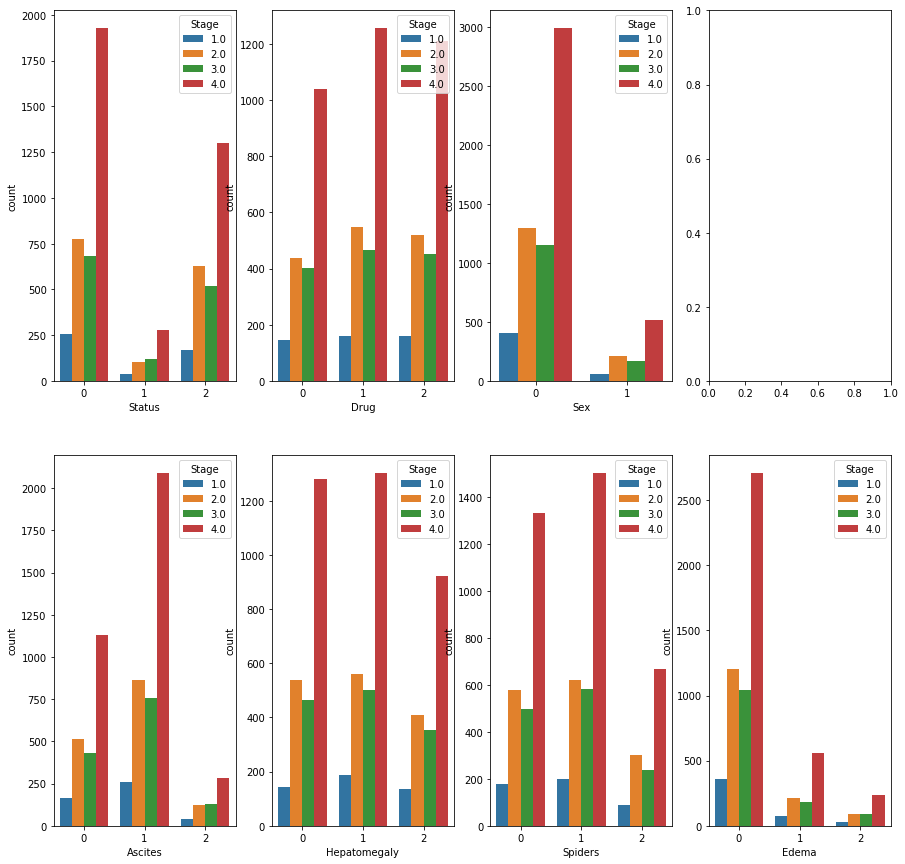

In [11]:
fig, axes = plt.subplots(2 , 4, figsize=(15, 15))
sns.countplot(train["Status"],hue=train['Stage'] , ax = axes [0 , 0] )
sns.countplot(train["Drug"],hue=train['Stage'] , ax = axes [0 , 1] )
sns.countplot(train["Sex"],hue=train['Stage'] , ax = axes [0 , 2] )
sns.countplot(train["Ascites"],hue=train['Stage'] , ax = axes [1 , 0] )
sns.countplot(train["Hepatomegaly"],hue=train['Stage'] , ax = axes [1 , 1] )
sns.countplot(train["Spiders"],hue=train['Stage'] , ax = axes [1 , 2] )
sns.countplot(train["Edema"],hue=train['Stage'] , ax = axes [1 , 3] )

In [12]:
train["Drug"]. value_counts()

1    2434
2    2341
0    2025
Name: Drug, dtype: int64

In [13]:
train ["Age"] = ((train ["Age"]/365)).round()
test ["Age"] = ((test ["Age"]/365)).round()

In [14]:
train.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
6795,4622,1762,0,2,57.0,1,0,1,0,0,0.9,360.0,2.43,68.0,3444.40,131.590,130.0,314.0,12.9,1.0
6796,4446,2955,0,2,78.0,0,2,1,1,0,0.3,312.0,2.99,43.0,1563.15,88.505,238.0,399.0,10.6,4.0
6797,4082,584,0,0,66.0,0,1,2,0,0,0.3,218.0,2.79,68.0,1563.15,26.350,123.0,103.0,9.3,1.0
6798,2248,1426,1,1,54.0,0,1,0,2,0,0.3,312.0,1.96,12.0,289.00,72.950,134.0,354.0,10.6,2.0
6799,4826,125,2,1,69.0,0,2,1,0,0,5.9,312.0,3.65,68.0,1563.15,26.350,69.0,288.0,11.1,4.0


In [15]:
train.isnull().sum() 

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

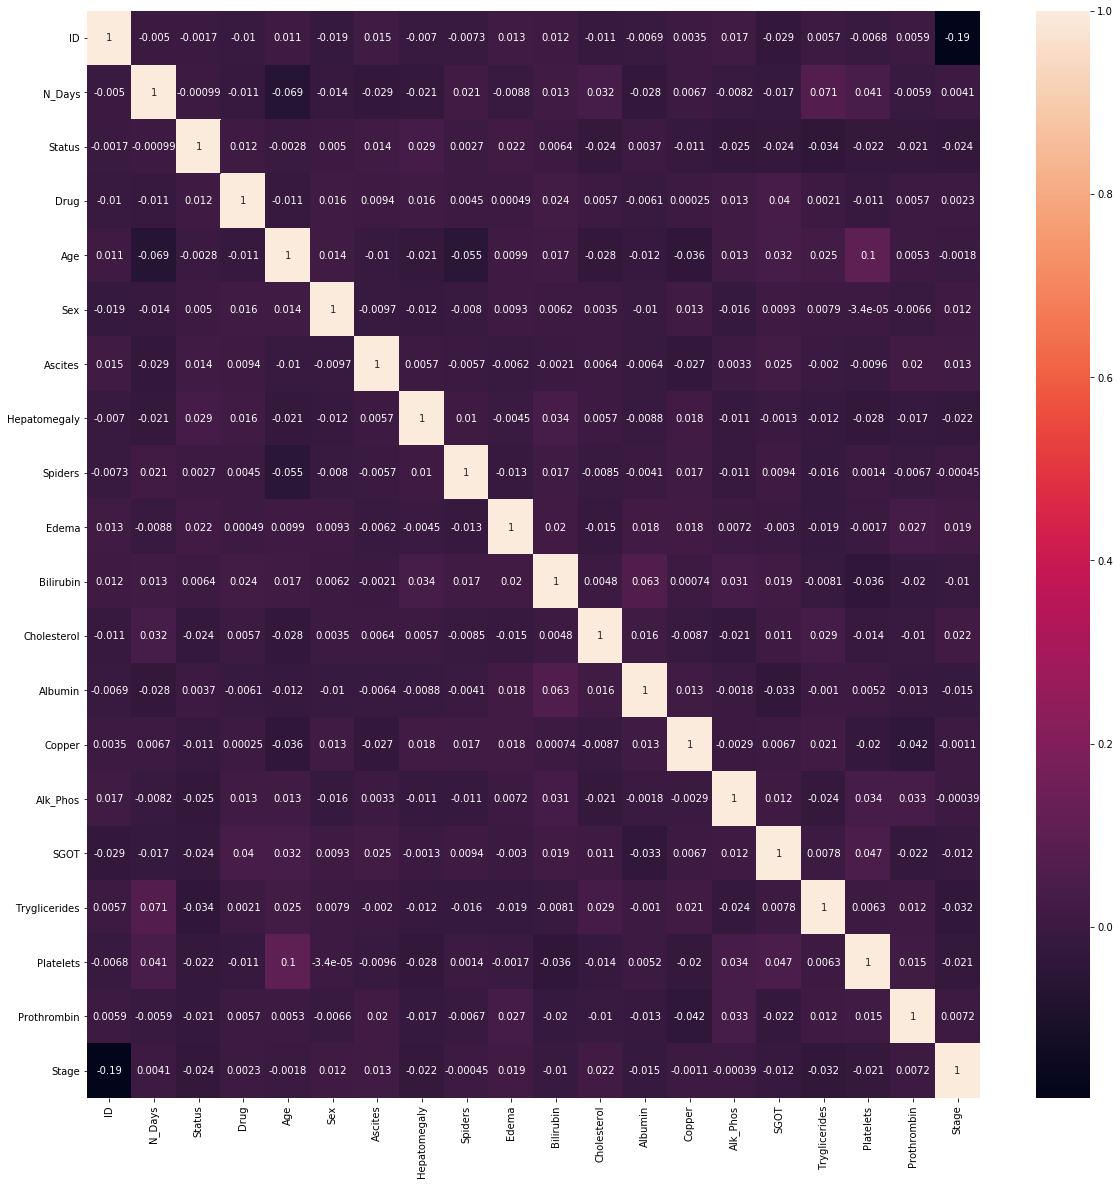

In [16]:
copy = train.copy()
plt.figure(figsize = (20,20))
sns.heatmap(copy.corr() , annot=True)


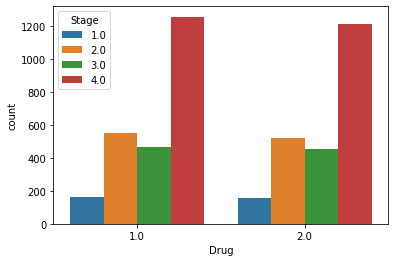

In [17]:
cats = ['Drug','Ascites','Hepatomegaly','Spiders']

for col in cats :
    train[col]. replace(0 , np.nan, inplace=True)
    test[col]. replace(0, np.nan, inplace=True)
sns.countplot(train["Drug"],hue=train['Stage'])

In [36]:
impu = train . copy ()
display (impu["Hepatomegaly"]. value_counts() , impu.tail() ,train.isnull().sum() )

1.0    2554
2.0    1819
Name: Hepatomegaly, dtype: int64

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
6795,4622,1762,0,2.0,57.0,1,NaN,1.0,NaN,0,0.9,360.0,2.43,68.0,3444.40,131.590,130.0,314.0,12.9,1.0
6796,4446,2955,0,2.0,78.0,0,2.0,1.0,1.0,0,0.3,312.0,2.99,43.0,1563.15,88.505,238.0,399.0,10.6,4.0
6797,4082,584,0,NaN,66.0,0,1.0,2.0,NaN,0,0.3,218.0,2.79,68.0,1563.15,26.350,123.0,103.0,9.3,1.0
6798,2248,1426,1,1.0,54.0,0,1.0,NaN,2.0,0,0.3,312.0,1.96,12.0,289.00,72.950,134.0,354.0,10.6,2.0
6799,4826,125,2,1.0,69.0,0,2.0,1.0,NaN,0,5.9,312.0,3.65,68.0,1563.15,26.350,69.0,288.0,11.1,4.0


ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

In [38]:
?? KNN

In [40]:
testdf = test . copy ()
testdf = pd.DataFrame(np.round(imputer.fit_transform(testdf)),columns = testdf.columns)
testdf.head()

Imputing row 1/3200 with 1 missing, elapsed time: 1.676
Imputing row 101/3200 with 1 missing, elapsed time: 1.681
Imputing row 201/3200 with 1 missing, elapsed time: 1.686
Imputing row 301/3200 with 3 missing, elapsed time: 1.690
Imputing row 401/3200 with 1 missing, elapsed time: 1.695
Imputing row 501/3200 with 2 missing, elapsed time: 1.700
Imputing row 601/3200 with 3 missing, elapsed time: 1.705
Imputing row 701/3200 with 2 missing, elapsed time: 1.709
Imputing row 801/3200 with 1 missing, elapsed time: 1.713
Imputing row 901/3200 with 2 missing, elapsed time: 1.717
Imputing row 1001/3200 with 0 missing, elapsed time: 1.722
Imputing row 1101/3200 with 2 missing, elapsed time: 1.727
Imputing row 1201/3200 with 1 missing, elapsed time: 1.731
Imputing row 1301/3200 with 2 missing, elapsed time: 1.736
Imputing row 1401/3200 with 1 missing, elapsed time: 1.740
Imputing row 1501/3200 with 0 missing, elapsed time: 1.744
Imputing row 1601/3200 with 2 missing, elapsed time: 1.748
Imputing 

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3870.0,41.0,0.0,2.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,247.0,4.0,68.0,1552.0,109.0,127.0,169.0,12.0
1,3462.0,1811.0,0.0,1.0,44.0,0.0,1.0,2.0,1.0,0.0,0.0,311.0,3.0,92.0,1748.0,89.0,129.0,321.0,12.0
2,1632.0,954.0,0.0,1.0,74.0,0.0,1.0,1.0,1.0,0.0,0.0,308.0,4.0,68.0,1552.0,44.0,127.0,296.0,10.0
3,722.0,1969.0,2.0,2.0,47.0,0.0,1.0,2.0,1.0,0.0,1.0,308.0,3.0,68.0,617.0,114.0,127.0,125.0,11.0
4,1000.0,2721.0,2.0,1.0,49.0,0.0,1.0,1.0,1.0,0.0,3.0,308.0,2.0,89.0,1782.0,89.0,129.0,138.0,11.0


In [26]:
imputer = KNN(n)
lastdf = pd.DataFrame(np.round(imputer.fit_transform(impu)),columns = impu.columns)

C:\Users\EGYPT\anaconda3\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/6800 with 0 missing, elapsed time: 6.411
Imputing row 101/6800 with 0 missing, elapsed time: 6.411
Imputing row 201/6800 with 0 missing, elapsed time: 6.411
Imputing row 301/6800 with 0 missing, elapsed time: 6.412
Imputing row 401/6800 with 0 missing, elapsed time: 6.412
Imputing row 501/6800 with 0 missing, elapsed time: 6.412
Imputing row 601/6800 with 0 missing, elapsed time: 6.412
Imputing row 701/6800 with 0 missing, elapsed time: 6.412
Imputing row 801/6800 with 0 missing, elapsed time: 6.413
Imputing row 901/6800 with 0 missing, elapsed time: 6.413
Imputing row 1001/6800 with 0 missing, elapsed time: 6.413
Imputing row 1101/6800 with 0 missing, elapsed time: 6.413
Imputing row 1201/6800 with 0 missing, elapsed time: 6.413
Imputing row 1301/6800 with 0 missing, elapsed time: 6.414
Imputing row 1401/6800 with 0 missing, elapsed time: 6.414
Imputing row 1501/6800 with 0 missing, elapsed time: 6.414
Imputing row 1601/6800 with 0 missing, elapsed time: 6.414
Imputing 

In [29]:
lastdf.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
6795,4622.0,1762.0,0.0,2.0,57.0,1.0,1.0,1.0,1.0,0.0,1.0,360.0,2.0,68.0,3444.0,132.0,130.0,314.0,13.0,1.0
6796,4446.0,2955.0,0.0,2.0,78.0,0.0,2.0,1.0,1.0,0.0,0.0,312.0,3.0,43.0,1563.0,89.0,238.0,399.0,11.0,4.0
6797,4082.0,584.0,0.0,1.0,66.0,0.0,1.0,2.0,1.0,0.0,0.0,218.0,3.0,68.0,1563.0,26.0,123.0,103.0,9.0,1.0
6798,2248.0,1426.0,1.0,1.0,54.0,0.0,1.0,1.0,2.0,0.0,0.0,312.0,2.0,12.0,289.0,73.0,134.0,354.0,11.0,2.0
6799,4826.0,125.0,2.0,1.0,69.0,0.0,2.0,1.0,1.0,0.0,6.0,312.0,4.0,68.0,1563.0,26.0,69.0,288.0,11.0,4.0


In [37]:
display (lastdf["Hepatomegaly"]. value_counts() , lastdf.tail() ,lastdf.isnull().sum() )

1.0    4981
2.0    1819
Name: Hepatomegaly, dtype: int64

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
6795,4622.0,1762.0,0.0,2.0,57.0,1.0,1.0,1.0,1.0,0.0,1.0,360.0,2.0,68.0,3444.0,132.0,130.0,314.0,13.0,1.0
6796,4446.0,2955.0,0.0,2.0,78.0,0.0,2.0,1.0,1.0,0.0,0.0,312.0,3.0,43.0,1563.0,89.0,238.0,399.0,11.0,4.0
6797,4082.0,584.0,0.0,1.0,66.0,0.0,1.0,2.0,1.0,0.0,0.0,218.0,3.0,68.0,1563.0,26.0,123.0,103.0,9.0,1.0
6798,2248.0,1426.0,1.0,1.0,54.0,0.0,1.0,1.0,2.0,0.0,0.0,312.0,2.0,12.0,289.0,73.0,134.0,354.0,11.0,2.0
6799,4826.0,125.0,2.0,1.0,69.0,0.0,2.0,1.0,1.0,0.0,6.0,312.0,4.0,68.0,1563.0,26.0,69.0,288.0,11.0,4.0


ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Model

In [43]:
X = lastdf . drop (['ID' , 'Stage'] , axis = 1)
y = lastdf['Stage']

In [51]:
MS = MinMaxScaler()
X = MS . fit_transform (X)

In [53]:
xtrain , xtest , ytrain , ytest = train_test_split (X,y)

In [59]:
Model = LogisticRegression()
Model . fit (xtrain , ytrain)
ypred = Model . predict (xtest)
score =accuracy_score(ytest,ypred)
score #a7a 5ara neikkk

0.5058823529411764

In [60]:
f1_score (ytest , ypred ,average='weighted')

0.33988970588235295

In [64]:
MModel = RandomForestClassifier()
MModel . fit (xtrain , ytrain)
ypred = MModel . predict (xtest)
sScore =accuracy_score(ytest,ypred)
sScore #a7a 5ara neikkk

0.5052941176470588

In [65]:
f1_score (ytest , ypred ,average='weighted')

0.3601203853886165

In [71]:
rf=RandomForestClassifier()
param_test ={
'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}
gsearch = GridSearchCV(estimator=rf,param_grid=param_test,scoring='f1_weighted',n_jobs=-1,cv=5)
gsearch.fit(xtrain,ytrain)
gsearch.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [73]:
ypred = gsearch . predict (xtest)
Score =accuracy_score(ytest,ypred)
Score

0.4894117647058824

In [74]:
f1_score (ytest , ypred ,average='weighted')

0.35864538090357134